In [20]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr

%matplotlib inline

#### Example 1: load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [22]:
%%time
start= dt.datetime(2015,3,1)
end=dt.datetime(2015,8,1) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results/SalishSea/nowcast-green.201812/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results/SalishSea/nowcast-green.201812/01mar1... 2015-03-01 2015-03-02
1    /results/SalishSea/nowcast-green.201812/02mar1... 2015-03-02 2015-03-03
2    /results/SalishSea/nowcast-green.201812/03mar1... 2015-03-03 2015-03-04
3    /results/SalishSea/nowcast-green.201812/04mar1... 2015-03-04 2015-03-05
4    /results/SalishSea/nowcast-green.201812/05mar1... 2015-03-05 2015-03-06
..                                                 ...        ...        ...
149  /results/SalishSea/nowcast-green.201812/28jul1... 2015-07-28 2015-07-29
150  /results/SalishSea/nowcast-green.201812/29jul1... 2015-07-29 2015-07-30
151  /results/SalishSea/nowcast-green.201812/30jul1... 2015-07-30 2015-07-31
152  /results/SalishSea/nowcast-green.201812/31jul1... 2015-07-31 2015-08-01
153  /results/SalishSea/nowcast-green.201812/01aug1... 2015-08-01 2015-08-02

[154 rows x 3 columns]
CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall 

In [23]:
# reminder of variable names in ptrc files:
with nc.Dataset(flist.loc[0,['paths']].values[0]) as ff: #  <-when you access elements of a pandas array, sometimes
                                                         #    you get an array output, even if it only contains one
                                                         #    element. To get the element rather than the array 
                                                         #     containing it, use [0]
    print(ff.variables.keys())
    # also grab time reference:
    torig=dt.datetime.strptime(ff.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print('time origin:',torig)

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'Fraser_tracer', 'mesozooplankton'])
time origin: 1900-01-01 00:00:00


In [24]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level


In [25]:
bio=xr.open_mfdataset(flist['paths'])

In [26]:
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 154, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2015-03-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20150301_20150310
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-29 05:42:24 GMT
    uuid:         2a425a7d-72d1-4d9e-bb31-20003d0cf777

In [27]:
%%time
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii) #isel lets you select by index;zero here could also =ik
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)
mesZ=bio.mesozooplankton.isel(deptht=0,y=ij,x=ii)
flag=bio.flagellates.isel(deptht=0,y=ij,x=ii)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.22 ms


CPU times: user 1min 45s, sys: 14.9 s, total: 2min
Wall time: 2min 58s


(16495.5, 16648.5)

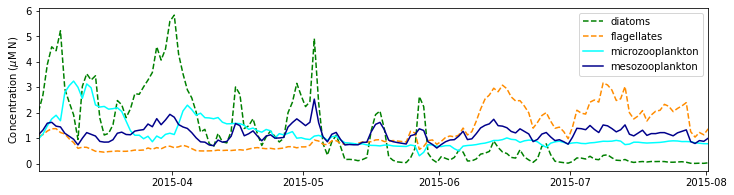

In [34]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c--',color='green',label='diatoms')
ax.plot(tt,flag,'--',color='darkorange',label='flagellates')
ax.plot(tt,micZ,'-',color='cyan',label='microzooplankton')
ax.plot(tt,mesZ,'-',color='darkblue',label='mesozooplankton')
ax.legend(loc=1);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [31]:
bio.close()